In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
from numpy import dot

In [2]:
import pandas as pd 
data = pd.read_csv("C:/Python37_Project/bundle_archive/movies_metadata.csv")
# data.head() 
# data.info()
data=data.head(20000)
data['overview'].isnull().sum()
data['overview']=data['overview'].fillna('')
data['overview'].isnull().sum()

0

In [27]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [3]:
data = data.drop_duplicates(['title'])

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf = TfidfVectorizer(stop_words='english')
Tfidf


TfidfVectorizer(stop_words='english')

In [5]:
TfidfMatrix = Tfidf.fit_transform(data['overview'])
# TfidfMatrix[0].index

In [6]:
from sklearn.metrics.pairwise import linear_kernel
cos_sim = linear_kernel(TfidfMatrix, TfidfMatrix)
cos_sim

array([[1.        , 0.01587494, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01587494, 1.        , 0.04904833, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04904833, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.08332097],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08332097, 0.        ,
        1.        ]])

In [7]:
indices = pd.Series(data.index, index=data['title']).drop_duplicates()
print(indices.head())

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64


In [8]:
indices

title
Toy Story                                                                       0
Jumanji                                                                         1
Grumpier Old Men                                                                2
Waiting to Exhale                                                               3
Father of the Bride Part II                                                     4
                                                                            ...  
Rebellion                                                                   19995
Versailles                                                                  19996
Two in the Wave                                                             19997
Lotte Reiniger: Homage to the Inventor of the Silhouette Film               19998
RKO Production 601: The Making of 'Kong, the Eighth Wonder of the World'    19999
Length: 19099, dtype: int64

In [9]:
def getRecommendation(title, cosine_sim = cos_sim):
    idx = indices[title]
    simScore = list(enumerate(cosine_sim[idx]))
    simScore = sorted(simScore, key = lambda x : x[1], reverse=True)
    simScore = simScore[1:21]
    movieidx = [i[0] for i in simScore]
    return data['title'].iloc[movieidx]

getRecommendation(data['title'][2])

9207                    An Extremely Goofy Movie
443                                     Fearless
235                                A Goofy Movie
4101                               Heartbreakers
1617                                        Bent
9116                            Wishful Thinking
2282                                    Rushmore
4545                                         Tap
456                                      Go Fish
8071                                  Collateral
7970                       The City of No Limits
16495                               Emma's Bliss
3397                         The End of Violence
1746                              Kissing a Fool
7734                                 City of Joy
11394                                A Good Year
10105    The Adventures of Sharkboy and Lavagirl
18136                              The River Why
6948                                  CrissCross
5781                                     Android
Name: title, dtype: 

In [11]:
c = data.vote_average.mean()
m = data.vote_count.quantile(0.9)

In [12]:
m

344.0

In [13]:
q_movie = data.copy().loc[data.vote_count >= m]
q_movie

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,3.735540e+08,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,2.627972e+08,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,1.874368e+08,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,3.521940e+08,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
12,False,"{'id': 117693, 'name': 'Balto Collection', 'po...",0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,21032,tt0112453,en,Balto,An outcast half-wolf risks his life to prevent...,...,1995-12-22,1.134832e+07,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19825,False,NaN,145000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",http://www.riseoftheguardians.com/,81188,tt1446192,en,Rise of the Guardians,When an evil spirit known as Pitch lays down t...,...,2012-11-21,3.069417e+08,97.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You better believe.,Rise of the Guardians,False,7.1,1981.0
19862,False,"{'id': 86092, 'name': 'Step Up Collection', 'p...",33000000,"[{'id': 10402, 'name': 'Music'}, {'id': 18, 'n...",NaN,85446,tt1800741,en,Step Up Revolution,Emily arrives in Miami with aspirations to bec...,...,2012-07-26,1.404707e+08,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One Step Can Change Your World,Step Up Revolution,False,6.7,679.0
19901,False,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://www.disneyanimation.com/projects/shorts...,140420,tt2388725,en,Paperman,An urban office worker finds that paper airpla...,...,2012-11-02,0.000000e+00,7.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Delicate, charming and sweet.",Paperman,False,8.0,734.0
19928,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",http://www.hitchcockthemovie.com/,112336,tt0975645,en,Hitchcock,Hitchcock follows the relationship between dir...,...,2012-11-22,2.357054e+07,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Good evening.,Hitchcock,False,6.3,527.0


In [14]:
def weight_rating(x, m=m, c=c):
    v = x['vote_count']
    R = x['vote_average']

    return (v/(v+m)*R) + (m/(m+v) *c)

In [15]:
q_movie['score'] = q_movie.apply(weight_rating, axis=1 )

In [16]:
q_movie = q_movie.sort_values('score', ascending= False)
q_movie[['title', 'vote_count', 'vote_average', 'score']].head(20)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.401282
834,The Godfather,6024.0,8.5,8.365099
12481,The Dark Knight,12269.0,8.3,8.237347
2843,Fight Club,9678.0,8.3,8.221149
292,Pulp Fiction,8670.0,8.3,8.212331
522,Schindler's List,4436.0,8.3,8.134676
5481,Spirited Away,3968.0,8.3,8.116733
351,Forrest Gump,8147.0,8.2,8.110983
2211,Life Is Beautiful,3643.0,8.3,8.101794
1178,The Godfather: Part II,3418.0,8.3,8.089940


Text(0.5, 1.0, 'Popular Movies')

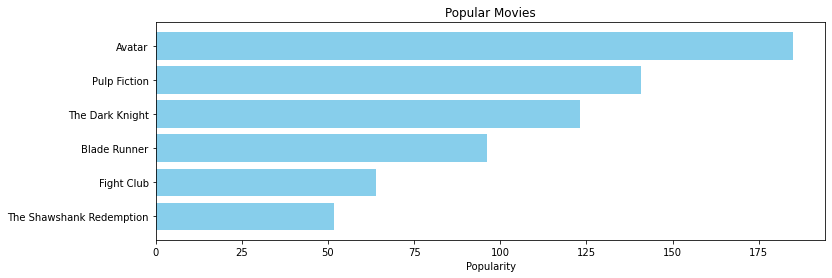

In [17]:
pop= data.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [18]:
data['overview'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [19]:
from keras import models, layers
#from keras.models import Sequential

In [20]:
xtrain = TfidfMatrix[:15000]
xtest = TfidfMatrix[15000:]

In [21]:
ytrain=indices[:15000]
ytrain
ytest=indices[15000:]
ytest

title
The Family                                                                  15592
The Terrace                                                                 15593
Dreamboat                                                                   15594
The Desperados                                                              15595
Grip of the Strangler                                                       15596
                                                                            ...  
Rebellion                                                                   19995
Versailles                                                                  19996
Two in the Wave                                                             19997
Lotte Reiniger: Homage to the Inventor of the Silhouette Film               19998
RKO Production 601: The Making of 'Kong, the Eighth Wonder of the World'    19999
Length: 4099, dtype: int64

In [22]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(15000,)))  #입력계층
#모델에다가 계층 1개를 추가해라
model.add(layers.Dense(16,activation='relu'))  #히든계층
model.add(layers.Dense(1,activation='sigmoid')) #출력계층

In [23]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# 아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천

In [26]:
ratings = pd.read_csv('bundle_archive/ratings.csv')

In [24]:
def predict_rating(rating_arr, item_sim_arr):
    rating_pred = rating_arr.dot(item_sim_arr)/ np.array([np.abs(item_sim_arr).sum(axis = 1)])
    return rating_pred

In [ ]:
rating_pred = predict_rating(ra)